# Retail Data Wrangling and Analytics

In [1]:
# Import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Formatting
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Load csv into dataframe
retail_df = pd.read_csv('online_retail.csv')

# Total Invoice Amount Distribution

In [2]:
# Calculating invoice totals
retail_df['InvoiceAmount'] = retail_df['Quantity'] * retail_df['Price']

retail_df_filtered = retail_df[retail_df['InvoiceAmount'] > 0]

invoice_amounts = retail_df_filtered.groupby('Invoice')['InvoiceAmount'].sum().reset_index()

invoice_amounts.columns = ['Invoice', 'InvoiceTotal']

Minimum:0.19
Mean:509.30
Median:303.15
Mode:15.00
Maximum:77183.60



C:\Users\Ryan\AppData\Local\Temp\ipykernel_17464\514099495.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


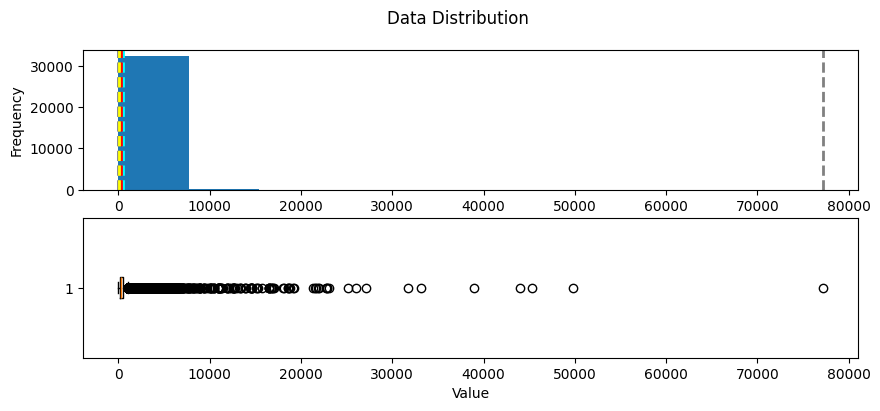

In [3]:
# Box plot of invoice totals
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

show_distribution(invoice_amounts['InvoiceTotal'])

C:\Users\Ryan\AppData\Local\Temp\ipykernel_17464\514099495.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Minimum:0.19
Mean:269.28
Median:253.00
Mode:15.00
Maximum:718.34



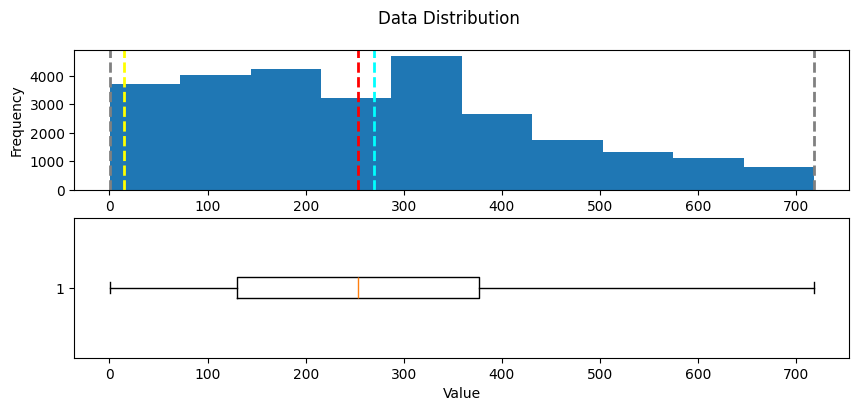

In [4]:
# Removal of outliers from distribution
removed_outliers = invoice_amounts[invoice_amounts.InvoiceTotal<invoice_amounts.InvoiceTotal.quantile(0.85)]['InvoiceTotal']

show_distribution(removed_outliers)

# Monthly Placed and Canceled Orders

<Axes: title={'center': 'Placed/Canceled Orders Per Month'}, xlabel='Month', ylabel='# of Placed/Canceled Orders'>

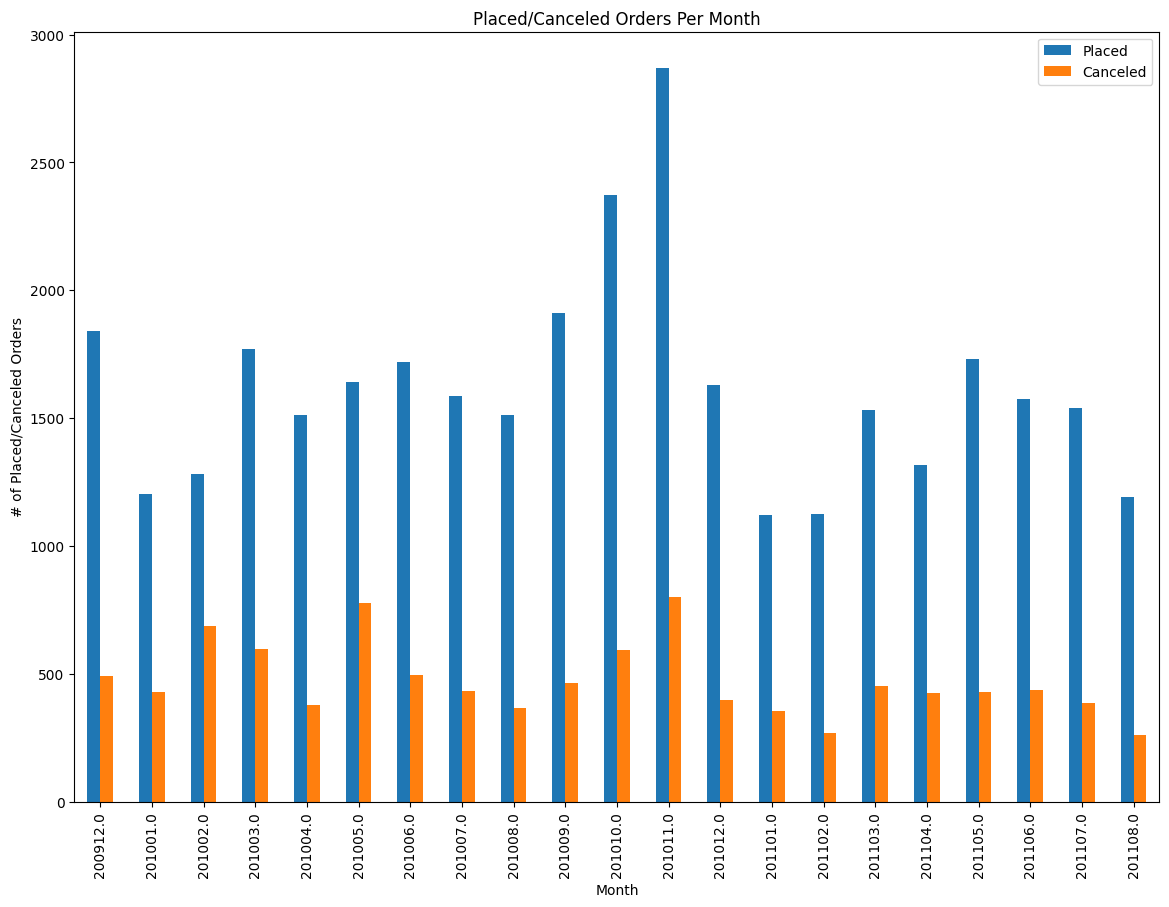

In [5]:
# Create 'YearMonth' column
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
retail_df['YearMonth'] = (retail_df['InvoiceDate'].dt.year * 100 + retail_df['InvoiceDate'].dt.month)

# Create 'Placed' and 'Canceled' columns as booleans
retail_df['Placed'] = retail_df['Quantity'] > 0
retail_df['Canceled'] = retail_df['Quantity'] < 0

# Group by 'Invoice' and sum 'Placed' and 'Canceled' columns
monthly_order_counts = (
    retail_df.groupby(['Invoice', 'YearMonth'])
    .agg(
        Placed=('Placed', 'max'),
        Canceled=('Canceled', 'max')
    )
    .reset_index()
)

monthly_order_counts = (
    monthly_order_counts.groupby('YearMonth')
    .agg(
        Placed=('Placed', 'sum'),    # Count unique placed invoices
        Canceled=('Canceled', 'sum')  # Count unique canceled invoices
    )
    .reset_index()
)

# Plot
monthly_order_counts.plot(
    x='YearMonth',
    y=['Placed', 'Canceled'],
    kind='bar',
    figsize=(14, 10),
    title='Placed/Canceled Orders Per Month',
    xlabel='Month',
    ylabel='# of Placed/Canceled Orders'
 )

# Monthly Sales

In [6]:
# Monthly Sales
monthly_sales = retail_df.groupby('YearMonth')['InvoiceAmount'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(int)
monthly_sales.rename(columns={'InvoiceAmount':'MonthlySales'}, inplace=True)

Text(0, 0.5, 'Sales(Millions)')

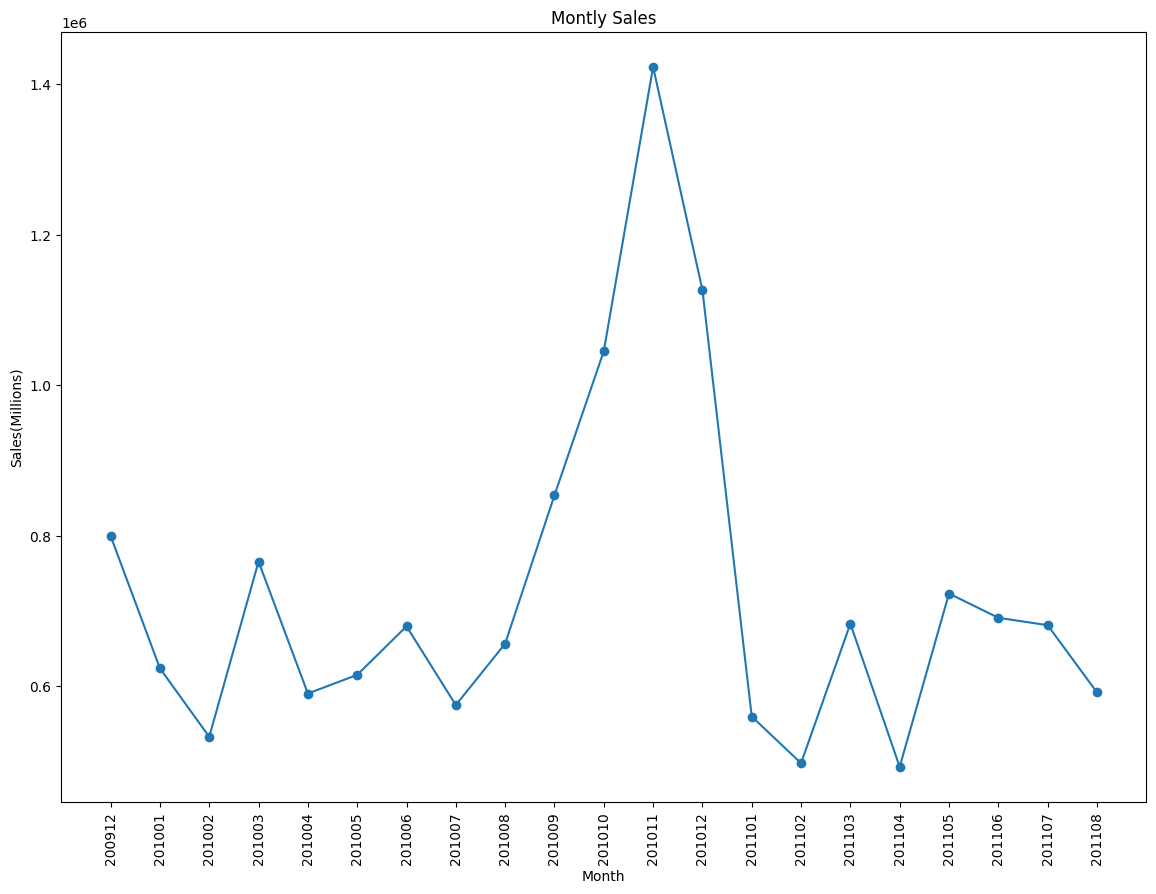

In [7]:
# Plot
plt.figure(figsize=(14,10))
plt.plot(monthly_sales["MonthlySales"], marker='o')

# Plot x axis
x_positions = np.arange(len(monthly_sales))
plt.xticks(x_positions, monthly_sales["YearMonth"], rotation=90)

# Plot Labels
plt.title('Montly Sales')
plt.xlabel('Month')
plt.ylabel('Sales(Millions)')

# Monthly Sales Growth


In [8]:
# Monthly Sales Growth 
monthly_growth = (monthly_sales['MonthlySales'].pct_change()*100).reset_index()
monthly_growth['index'] = monthly_sales['YearMonth']
monthly_growth.rename(columns={'MonthlySales':'MonthlyGrowth','index':'YearMonth'}, inplace=True)

Text(0, 0.5, 'Growth (%)')

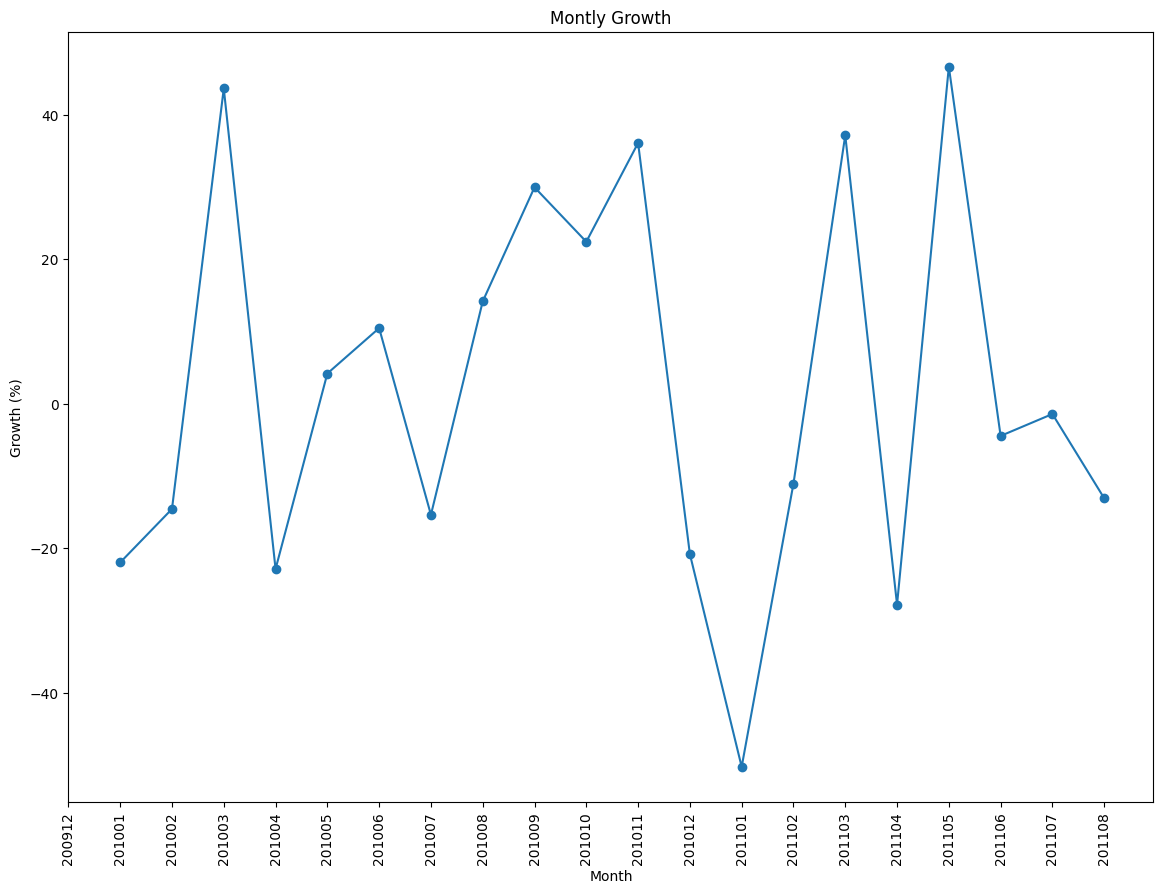

In [9]:
# Plot
plt.figure(figsize=(14,10))
plt.plot(monthly_growth["MonthlyGrowth"], marker='o')

# Plot x Axis
x_positions = np.arange(len(monthly_growth))
plt.xticks(x_positions, monthly_growth["YearMonth"], rotation=90)

# Plot Labels
plt.title('Montly Growth')
plt.xlabel('Month')
plt.ylabel('Growth (%)')

# Monthly Active Users

In [10]:
# Monthly Active Users
unique_customers = retail_df.groupby('YearMonth')['Customer ID'].nunique().reset_index()
unique_customers.rename(columns={'Customer ID':'ActiveUsers'}, inplace=True)
unique_customers['YearMonth'] = unique_customers['YearMonth'].astype(int)

Text(0, 0.5, '# of Active Users')

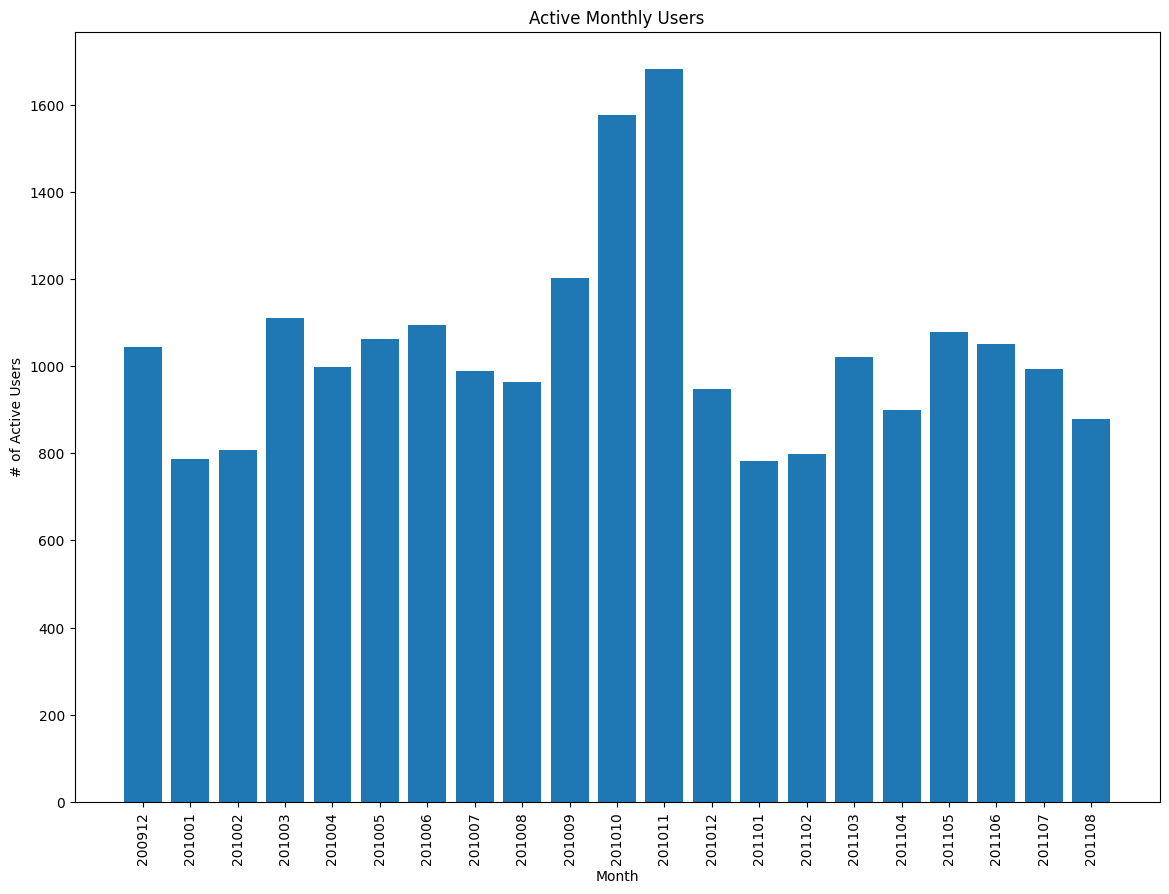

In [11]:
# Plot
plt.figure(figsize=(14,10))
plt.bar(x=x_positions, height=unique_customers['ActiveUsers'])
plt.xticks(x_positions, unique_customers['YearMonth'], rotation=90)
plt.title('Active Monthly Users')
plt.xlabel('Month')
plt.ylabel('# of Active Users')

# New and Existing Users



In [12]:
# Add first purchase data to retail_df
first_purchase = retail_df.groupby('Customer ID')['YearMonth'].min().reset_index()
first_purchase.rename(columns={'YearMonth': 'FirstPurchaseDate'}, inplace=True)
retail_df = retail_df.merge(first_purchase, on='Customer ID')

# Identify new and existing users
retail_df['UserType'] = np.where(
    retail_df['YearMonth'] == retail_df['FirstPurchaseDate'], 
    'New User', 
    'Existing User'
)

# Group Data
user_counts = retail_df.groupby(['YearMonth', 'UserType'])['Customer ID'].nunique().reset_index()
user_counts = user_counts.pivot(index='YearMonth', columns='UserType', values='Customer ID').fillna(0)
user_counts.reset_index(inplace=True)

Text(0, 0.5, '# of New/Existing Users')

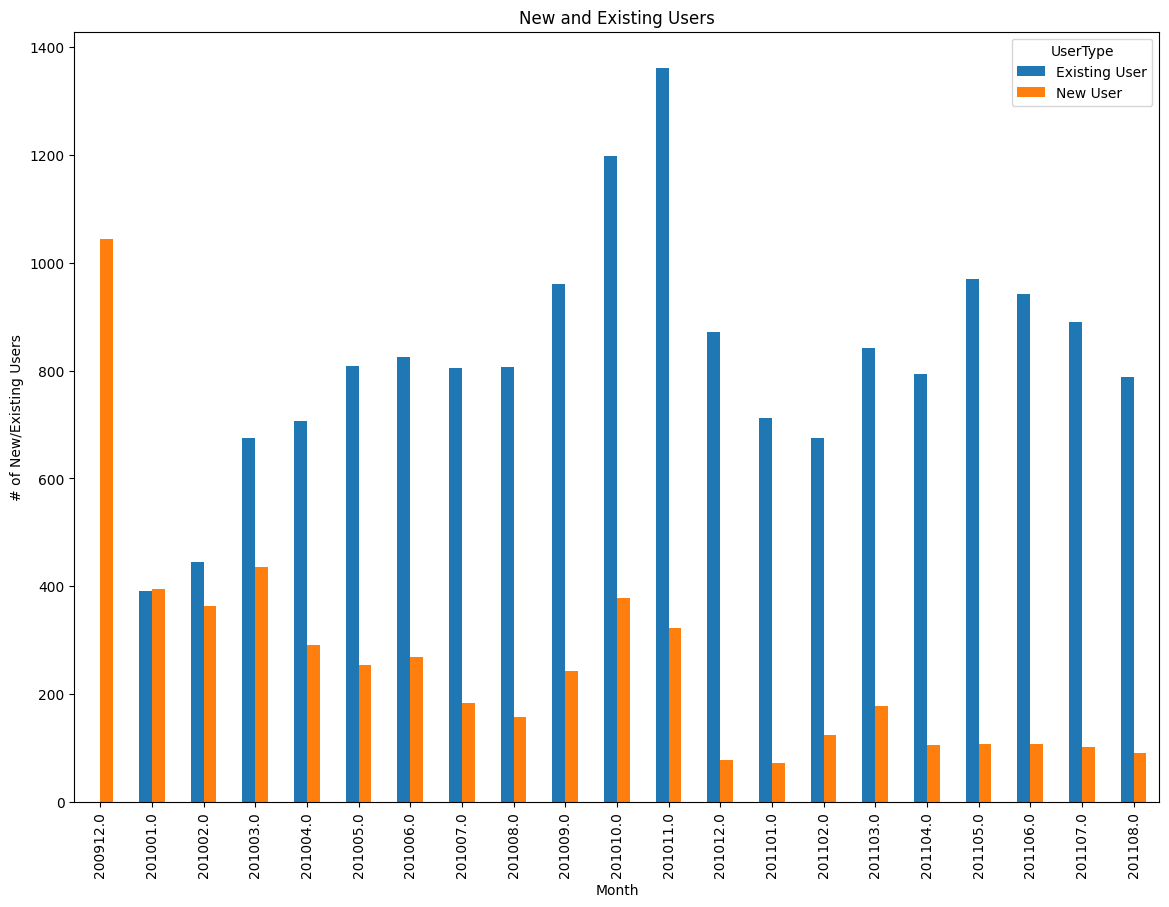

In [13]:
# Plot
user_counts.plot(x="YearMonth",y=['Existing User','New User'], kind='bar', figsize=(14,10))
plt.title('New and Existing Users')
plt.xlabel('Month')
plt.ylabel('# of New/Existing Users')

# RFM


In [14]:
# Recency = Number of days since last purchase
from datetime import datetime

recency = retail_df.groupby('Customer ID')['InvoiceDate'].max().reset_index(name='Recency')
recency['Recency'] = pd.to_datetime(recency['Recency'])
recency['Recency'] = (datetime.today() - recency['Recency']).dt.days

# Frequency = Total number of Invoices
frequency = retail_df.groupby('Customer ID')['Invoice'].nunique().reset_index(name='Frequency')

# Monetary = Total amount spent
monetary = retail_df.groupby('Customer ID')['InvoiceAmount'].sum().reset_index(name='Monetary')

# RFM Table
rfm = pd.merge(recency, frequency, on='Customer ID')
rfm = pd.merge(rfm, monetary, on='Customer ID')

In [15]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,5105,17,-65
1,12347,4909,6,4114
2,12348,5028,4,1709
3,12349,5187,4,2647
4,12350,5090,1,334


# RFM Segmentation

In [16]:
# RFM score values
rfm['RecencyScore'] = pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])

# RFM aggregate score
rfm["RFMScore"] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

# Segmenting of customers based on recency and frequency score values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

In [17]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Segment
0,12346,5105,17,-65,3,5,1,351,Loyal Customers
1,12347,4909,6,4114,5,4,5,545,Champions
2,12348,5028,4,1709,3,3,4,334,Need Attention
3,12349,5187,4,2647,2,3,5,235,At Risk
4,12350,5090,1,334,3,1,2,312,About to Sleep


In [18]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,5298,15329,1710,12346,13856,15322,16812,18287
Recency,5298,5087,172,4886,4932,5042,5200,5518
Frequency,5298,7,14,1,1,3,7,388
Monetary,5298,2493,11774,-25111,306,766,1997,469095


In [19]:
rfm[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
Segment                                                         
About to Sleep         5051   386         1   386      399   386
At Risk                5230   701         4   701     1057   701
Can't Lose             5201    61        14    61     4124    61
Champions              4899   775        22   775     9804   775
Hibernating            5294  1357         1  1357      339  1357
Loyal Customers        4988  1041        11  1041     3126  1041
Need Attention         5048   254         3   254      928   254
New Customers          4901    79         1    79      429    79
Potential Loyalists    4932   550         3   550      810   550
Promising              4952    94         1    94      342    94